In [73]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error



import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor 
from sklearn.kernel_ridge import KernelRidge

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [74]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
df = pd.read_csv('datasets/train.csv')

In [75]:
df.shape

(1460, 81)

In [76]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Colunas que podem ser excluídas

In [78]:
#dfsubset['PoolQC'].isna().sum()
#dfsubset['PoolArea'].value_counts()
#dfsubset['MiscFeature'].value_counts()
#dfsubset['Fence'].value_counts()
#dfsubset['MiscVal'].value_counts()
#dfsubset['SaleCondition'].value_counts()
#dfsubset['LowQualFinSF'].value_counts()

# Alley tem muitos valores nulos então convém excluir
#df['Alley'].isna().sum()

# excluir a coluna de Utilities porque só tem uma resposta
#df['Utilities'] 

# excluir a coluna 2ndFlrSF porque tem muitos valores zeros
#dfsubset['2ndFlrSF'].value_counts()

# excluir coluna de numero de cozinhas porque as respostas não tem diferenciação
#dfsubset['KitchenAbvGr'].value_counts()

In [79]:
dfsubset = df[['Id', #'MSSubClass', 
        'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       #'Alley', 
       #'LotShape', 
       #'LandContour', 
       #'Utilities', 
       'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
       #'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       #'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       #'MasVnrArea', 
       #'ExterQual', 'ExterCond', 'Foundation', 
       'BsmtQual',
       'BsmtCond', #'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       #'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
       'Heating',
       'HeatingQC', 'CentralAir', #'Electrical', 
       '1stFlrSF', 
       #'2ndFlrSF',
       #'LowQualFinSF', 
       #'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
       'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', #'Fireplaces', 'FireplaceQu', 
       'GarageType',
       #'GarageYrBlt', 
       #'GarageFinish', 
       'GarageCars', #'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', #'WoodDeckSF', 'OpenPorchSF',
       #'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
       #'PoolArea', 'PoolQC', 'Fence', 
       #'MiscFeature',
       #'MiscVal', 
       'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']].copy()

In [80]:
dfsubset.dtypes

Id                 int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
BsmtQual          object
BsmtCond          object
Heating           object
HeatingQC         object
CentralAir        object
1stFlrSF           int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
GarageType        object
GarageCars         int64
GarageCond        object
PavedDrive        object
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
dtype: object

In [81]:
dfsubset.shape

(1460, 37)

In [82]:
dfsubset.nunique(axis=0) 

Id               1460
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
BsmtQual            4
BsmtCond            4
Heating             6
HeatingQC           5
CentralAir          2
1stFlrSF          753
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
GarageType          6
GarageCars          5
GarageCond          5
PavedDrive          3
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
dtype: int64

## Transformando ranges da coluna de qualidade de aquecimento

In [83]:
dfsubset['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [84]:
dfsubset['HeatingQC'] = dfsubset['HeatingQC'].apply(lambda x: 'Good' if x in ['Ex', 'Gd'] else 'Average' if x in ['TA', 'Fa'] else 'Bad')
dfsubset['HeatingQC'].value_counts()

HeatingQC
Good       982
Average    477
Bad          1
Name: count, dtype: int64

## Transformação de medidas de Feet/Square Feet para Metro/Metro quadrado

In [85]:
# Lot Frontage
if 'LotFrontageMeters' not in dfsubset.columns:
    dfsubset['LotFrontageMeters'] = dfsubset['LotFrontage'].apply(lambda x: round(x/3.281, 2))

dfsubset = dfsubset.drop('LotFrontage', axis=1)

In [86]:
# Lot Area
if 'LotAreaSquareMeters' not in dfsubset.columns:
    dfsubset['LotAreaSquareMeters'] = dfsubset['LotArea'].apply(lambda x: round(x/10.764, 2))

dfsubset = dfsubset.drop('LotArea', axis=1)

In [87]:
# 1st Floor Square Feet
if 'SquareMeters1stFloor' not in dfsubset.columns:
    dfsubset['SquareMeters1stFloor'] = dfsubset['1stFlrSF'].apply(lambda x: round(x/10.764, 2))

dfsubset = dfsubset.drop('1stFlrSF', axis=1)


In [88]:
dfsubset.head()

,Id,MSZoning,Street,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,Heating,HeatingQC,CentralAir,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageCars,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageMeters,LotAreaSquareMeters,SquareMeters1stFloor
0,1,RL,Pave,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2003,2003,Gd,TA,GasA,Good,Y,2,1,3,1,Gd,8,Typ,Attchd,2,TA,Y,2,2008,WD,Normal,208500,19.81,785.02,79.52
1,2,RL,Pave,FR2,Gtl,Veenker,Feedr,Norm,1Story,6,8,1976,1976,Gd,TA,GasA,Good,Y,2,0,3,1,TA,6,Typ,Attchd,2,TA,Y,5,2007,WD,Normal,181500,24.38,891.86,117.24
2,3,RL,Pave,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2001,2002,Gd,TA,GasA,Good,Y,2,1,3,1,Gd,6,Typ,Attchd,2,TA,Y,9,2008,WD,Normal,223500,20.73,1045.15,85.47
3,4,RL,Pave,Corner,Gtl,Crawfor,Norm,Norm,2Story,7,5,1915,1970,TA,Gd,GasA,Good,Y,1,0,3,1,Gd,7,Typ,Detchd,3,TA,Y,2,2006,WD,Abnorml,140000,18.29,887.22,89.28
4,5,RL,Pave,FR2,Gtl,NoRidge,Norm,Norm,2Story,8,5,2000,2000,Gd,TA,GasA,Good,Y,2,1,4,1,Gd,9,Typ,Attchd,3,TA,Y,12,2008,WD,Normal,250000,25.60,1324.79,106.37


## Renomear Colunas

In [89]:
dfsubset = dfsubset.rename(columns={'MSZoning': 'DwellingZone', 'OverallQual': 'QualidadeMateriais', 'OverallCond': 'QualidadeEstadoHabitacao', 
                                    'YearRemodAdd': 'AnoReforma', 'BsmtQual': 'BasementHeightRates', 'BsmtCond': 'BasementConditionRate', 
                                    'TotRmsAbvGrd': 'TotalRooms(NoBathRooms)'})

In [90]:
dfsubset.shape

(1460, 37)

In [91]:
dfsubset = dfsubset.dropna(subset=['BasementHeightRates'])

##### Verificação de nulos

In [92]:
dfsubset.isna().sum()

Id                            0
DwellingZone                  0
Street                        0
LotConfig                     0
LandSlope                     0
Neighborhood                  0
Condition1                    0
Condition2                    0
HouseStyle                    0
QualidadeMateriais            0
QualidadeEstadoHabitacao      0
YearBuilt                     0
AnoReforma                    0
BasementHeightRates           0
BasementConditionRate         0
Heating                       0
HeatingQC                     0
CentralAir                    0
FullBath                      0
HalfBath                      0
BedroomAbvGr                  0
KitchenAbvGr                  0
KitchenQual                   0
TotalRooms(NoBathRooms)       0
Functional                    0
GarageType                   74
GarageCars                    0
GarageCond                   74
PavedDrive                    0
MoSold                        0
YrSold                        0
SaleType

#### 1.0 Colunas com mais de 10% dos dados vazios podem ser deletadas

##### 1.1 LotFrontageMeters

In [93]:
dfsubset.isnull().sum().sort_values(ascending=False)/dfsubset.shape[0] > 0.1

LotFrontageMeters            True
GarageCond                  False
GarageType                  False
DwellingZone                False
Id                          False
LandSlope                   False
LotConfig                   False
Street                      False
Neighborhood                False
QualidadeMateriais          False
Condition1                  False
Condition2                  False
HouseStyle                  False
BasementHeightRates         False
BasementConditionRate       False
Heating                     False
HeatingQC                   False
CentralAir                  False
QualidadeEstadoHabitacao    False
YearBuilt                   False
AnoReforma                  False
BedroomAbvGr                False
HalfBath                    False
FullBath                    False
KitchenAbvGr                False
Functional                  False
TotalRooms(NoBathRooms)     False
GarageCars                  False
KitchenQual                 False
PavedDrive    

In [94]:
# deletando coluna LotFrontageMeters
dfsubset = dfsubset.drop(labels='LotFrontageMeters', axis=1)

### Verificação de colunas Categoricas (Objetivo: reduzir a quantidade de features do nosso modelo)

In [95]:
# Colunas categoricas que serão verificadas
columns_to_check = ['Street', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 
                    'BasementConditionRate', 'Heating', 'CentralAir', 'Functional', 
                    'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

# Limite de repetição -> 70%
threshold = 0.70

for col in columns_to_check:
    dominant_value_freq = dfsubset[col].value_counts().max() / dfsubset.shape[0]
    if dominant_value_freq > threshold:
        dfsubset = dfsubset.drop(labels=col, axis=1)
        


## Exclusão dos outliers numéricos

In [96]:
dfsubset.dtypes[dfsubset.dtypes != 'object']

Id                            int64
QualidadeMateriais            int64
QualidadeEstadoHabitacao      int64
YearBuilt                     int64
AnoReforma                    int64
FullBath                      int64
HalfBath                      int64
BedroomAbvGr                  int64
KitchenAbvGr                  int64
TotalRooms(NoBathRooms)       int64
GarageCars                    int64
MoSold                        int64
YrSold                        int64
SalePrice                     int64
LotAreaSquareMeters         float64
SquareMeters1stFloor        float64
dtype: object

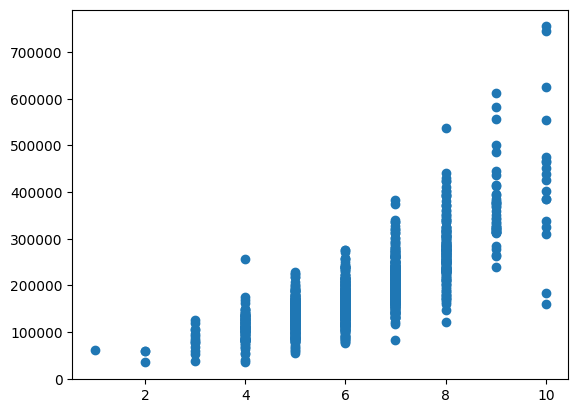

In [97]:
plt.scatter(x='QualidadeMateriais', y='SalePrice', data=dfsubset)

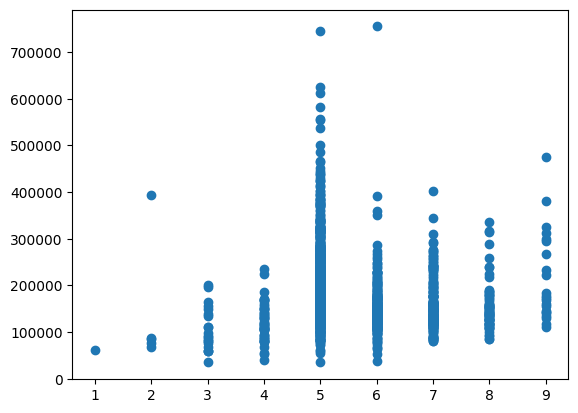

In [98]:
plt.scatter(x='QualidadeEstadoHabitacao', y='SalePrice', data=dfsubset)

In [99]:
dfsubset.query('SalePrice > 700000')
#692, 1183

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
691,692,RL,NoRidge,2Story,10,6,1994,1995,Ex,Good,3,1,4,1,Ex,10,Attchd,3,1,2007,755000,2000.65,227.05
1182,1183,RL,NoRidge,2Story,10,5,1996,1996,Ex,Good,3,1,4,1,Ex,10,Attchd,3,7,2007,745000,1451.41,223.99


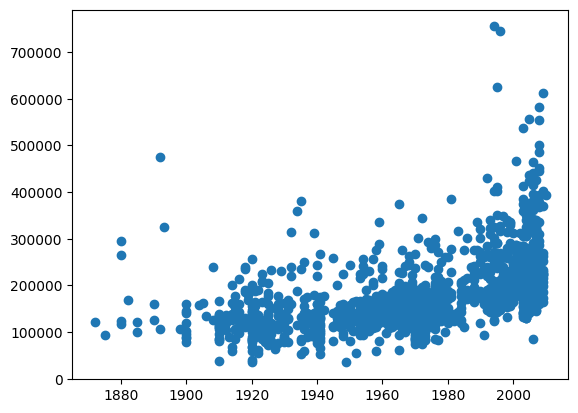

In [100]:
plt.scatter(x='YearBuilt', y='SalePrice', data=dfsubset)


In [101]:
dfsubset.query('YearBuilt > 1980 & SalePrice > 600000')
#692, 1170, 1183

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
691,692,RL,NoRidge,2Story,10,6,1994,1995,Ex,Good,3,1,4,1,Ex,10,Attchd,3,1,2007,755000,2000.65,227.05
898,899,RL,NridgHt,1Story,9,5,2009,2010,Ex,Good,2,1,2,1,Ex,11,Attchd,3,3,2010,611657,1200.20,219.62
1169,1170,RL,NoRidge,2Story,10,5,1995,1996,Ex,Good,3,1,4,1,Gd,10,Attchd,3,7,2006,625000,3322.19,170.10
1182,1183,RL,NoRidge,2Story,10,5,1996,1996,Ex,Good,3,1,4,1,Ex,10,Attchd,3,7,2007,745000,1451.41,223.99


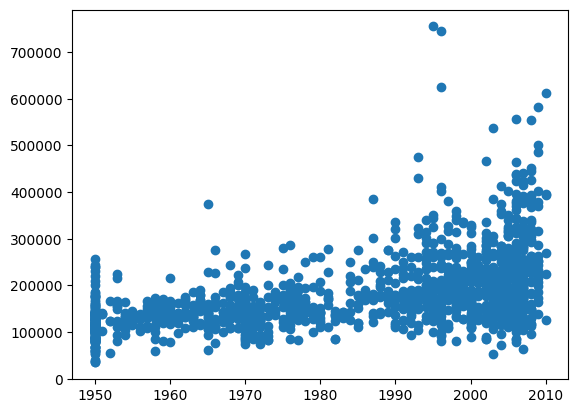

In [102]:
plt.scatter(x='AnoReforma', y='SalePrice', data=dfsubset)

In [103]:
dfsubset.query('AnoReforma > 1990 & SalePrice > 600000')
#692, 1183, 1170

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
691,692,RL,NoRidge,2Story,10,6,1994,1995,Ex,Good,3,1,4,1,Ex,10,Attchd,3,1,2007,755000,2000.65,227.05
898,899,RL,NridgHt,1Story,9,5,2009,2010,Ex,Good,2,1,2,1,Ex,11,Attchd,3,3,2010,611657,1200.20,219.62
1169,1170,RL,NoRidge,2Story,10,5,1995,1996,Ex,Good,3,1,4,1,Gd,10,Attchd,3,7,2006,625000,3322.19,170.10
1182,1183,RL,NoRidge,2Story,10,5,1996,1996,Ex,Good,3,1,4,1,Ex,10,Attchd,3,7,2007,745000,1451.41,223.99


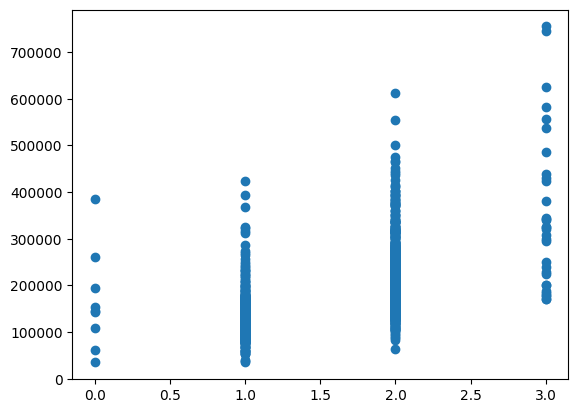

In [104]:
plt.scatter(x='FullBath', y='SalePrice', data=dfsubset)

In [105]:
dfsubset.query('FullBath == 3.0 & SalePrice > 700000')
#692, 1183

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
691,692,RL,NoRidge,2Story,10,6,1994,1995,Ex,Good,3,1,4,1,Ex,10,Attchd,3,1,2007,755000,2000.65,227.05
1182,1183,RL,NoRidge,2Story,10,5,1996,1996,Ex,Good,3,1,4,1,Ex,10,Attchd,3,7,2007,745000,1451.41,223.99


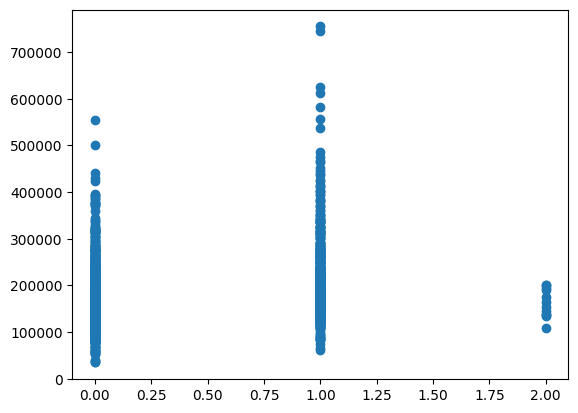

In [106]:
plt.scatter(x='HalfBath', y='SalePrice', data=dfsubset)

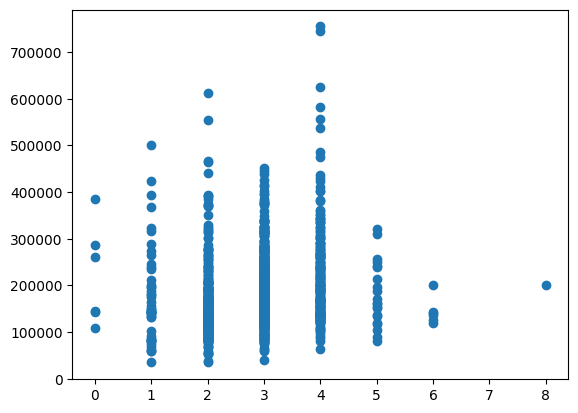

In [107]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=dfsubset)

In [108]:
dfsubset.query('BedroomAbvGr == 8')
#636

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
635,636,RH,SWISU,2.5Fin,6,7,1914,1995,TA,Good,2,0,8,2,Fa,14,NaN,0,3,2007,200000,1012.26,133.78


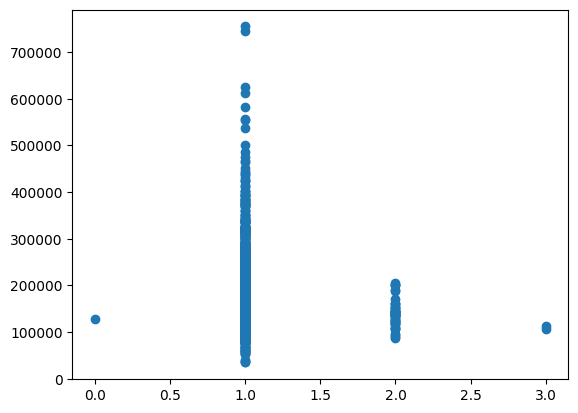

In [109]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=dfsubset)

In [110]:
dfsubset.query('KitchenAbvGr == 3.0 | KitchenAbvGr == 0.0')
#49, 810, 955

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
48,49,RM,OldTown,2Story,4,5,1920,2008,TA,Good,2,0,2,3,TA,8,NaN,0,6,2009,113000,413.97,68.38
809,810,RM,OldTown,2.5Unf,5,5,1898,1965,TA,Average,2,0,2,3,TA,11,Detchd,2,11,2009,106000,752.51,99.87
954,955,RL,Edwards,SFoyer,6,5,1975,1975,Gd,Average,2,0,4,0,TA,4,NaN,0,10,2006,127500,873.28,91.04


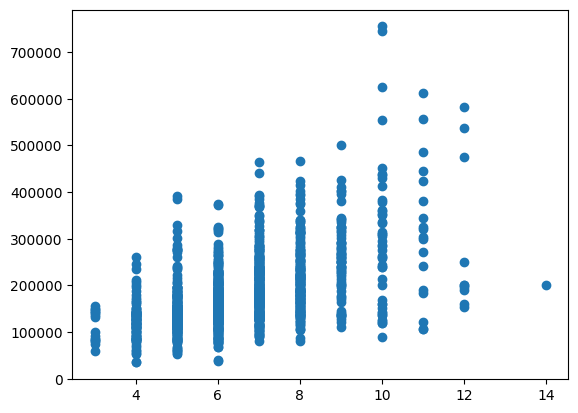

In [111]:
plt.scatter(x='TotalRooms(NoBathRooms)', y='SalePrice', data=dfsubset)

In [112]:
dfsubset.query('`TotalRooms(NoBathRooms)` == 14')
#636, 739(bsmtFullBath )

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
635,636,RH,SWISU,2.5Fin,6,7,1914,1995,TA,Good,2,0,8,2,Fa,14,NaN,0,3,2007,200000,1012.26,133.78


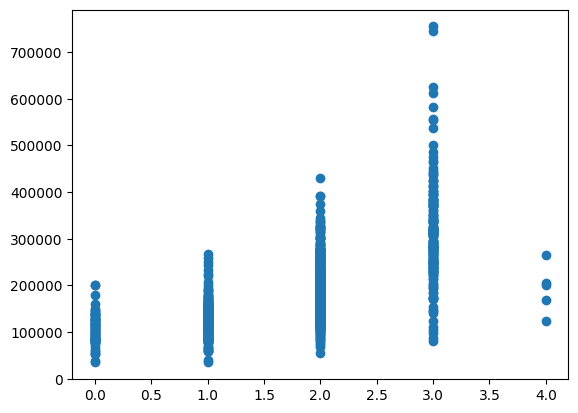

In [113]:
plt.scatter(x='GarageCars', y='SalePrice', data=dfsubset)

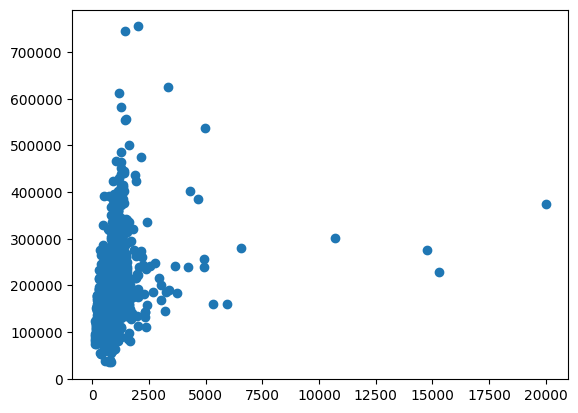

In [114]:
plt.scatter(x='LotAreaSquareMeters', y='SalePrice', data=dfsubset)

In [115]:
dfsubset.query('LotAreaSquareMeters > 17500')
#314

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
313,314,RL,Timber,1Story,7,5,1965,1965,Gd,Average,2,0,3,1,TA,8,Attchd,2,6,2009,375000,19996.75,189.15


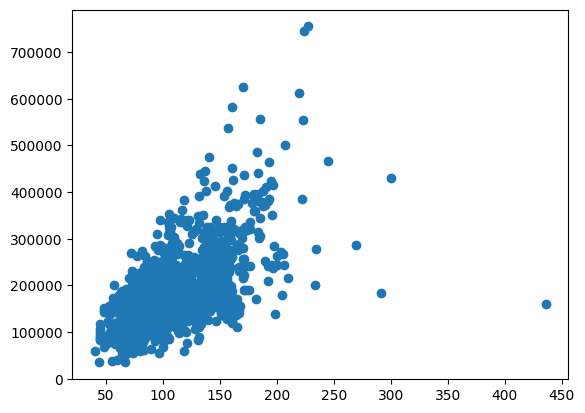

In [116]:
plt.scatter(x='SquareMeters1stFloor', y='SalePrice', data=dfsubset)

In [117]:
dfsubset.query('SquareMeters1stFloor > 400')
#1299

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
1298,1299,RL,Edwards,2Story,10,5,2008,2008,Ex,Good,2,1,3,1,Ex,12,Attchd,2,1,2008,160000,5935.25,435.9


In [137]:
values = [1299, 314, 636, 739, 49, 810, 955, 692, 1183, 1170]

def outlierExclusion(values, dfsubset):
    for value in values:
        if not dfsubset[dfsubset['Id'] == value].empty:
            dfsubset = dfsubset[dfsubset['Id'] != value]
    return 'Remocação bem sucedidada'

outlierExclusion(values, dfsubset)

'Remocação bem sucedidad'

In [138]:
dfsubset.query('Id == 1299')

,Id,DwellingZone,Neighborhood,HouseStyle,QualidadeMateriais,QualidadeEstadoHabitacao,YearBuilt,AnoReforma,BasementHeightRates,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms(NoBathRooms),GarageType,GarageCars,MoSold,YrSold,SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
1298,1299,RL,Edwards,2Story,10,5,2008,2008,Ex,Good,2,1,3,1,Ex,12,Attchd,2,1,2008,160000,5935.25,435.9


## Entedimento das Features

#### Sale Price

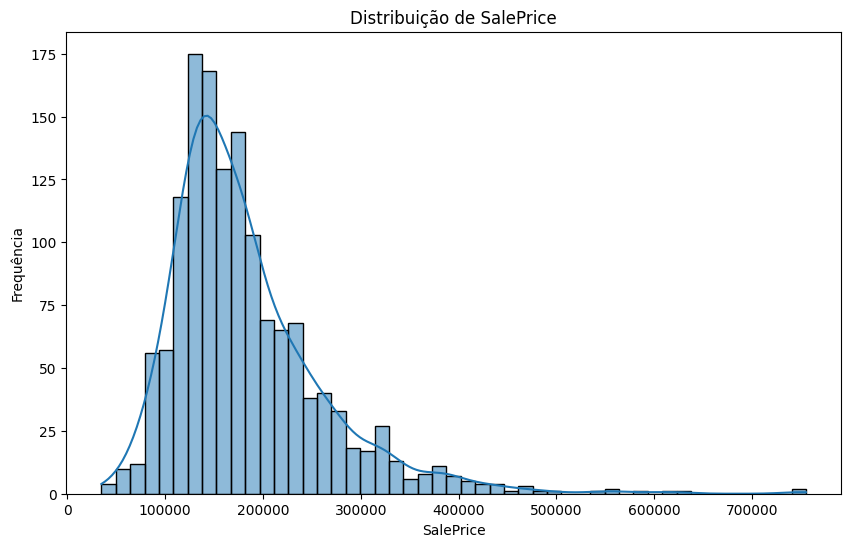

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(dfsubset['SalePrice'], kde=True)
plt.title('Distribuição de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequência')
plt.show()


#### Qualidade Materiais

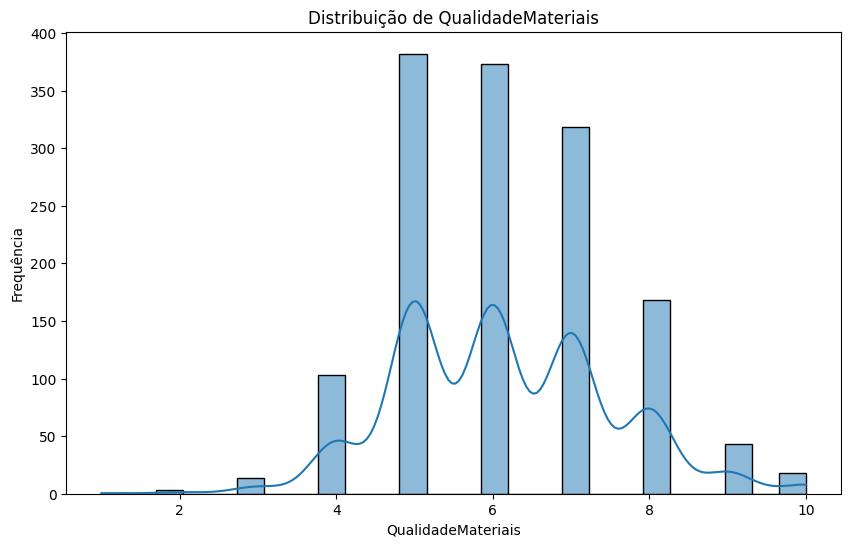

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(dfsubset['QualidadeMateriais'], kde=True)
plt.title('Distribuição de QualidadeMateriais')
plt.xlabel('QualidadeMateriais')
plt.ylabel('Frequência')
plt.show()


#### YearBuilt

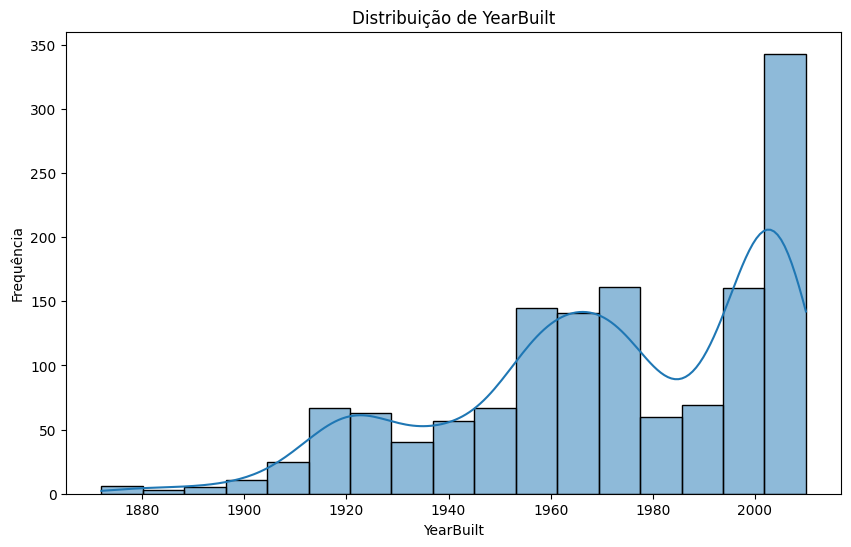

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(dfsubset['YearBuilt'], kde=True)
plt.title('Distribuição de YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('Frequência')
plt.show()


#### AnoReforma



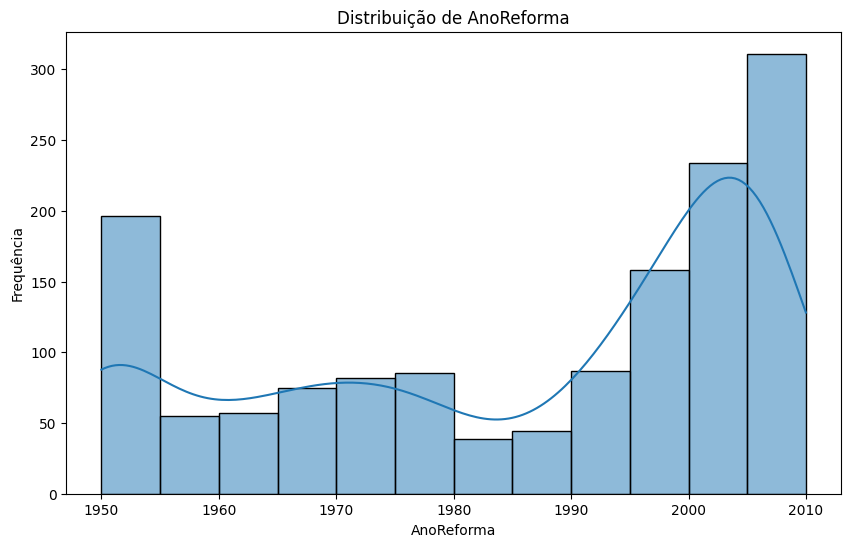

In [122]:
plt.figure(figsize=(10, 6))
sns.histplot(dfsubset['AnoReforma'], kde=True)
plt.title('Distribuição de AnoReforma')
plt.xlabel('AnoReforma')
plt.ylabel('Frequência')
plt.show()


#### TotalRooms(NoBathRooms)

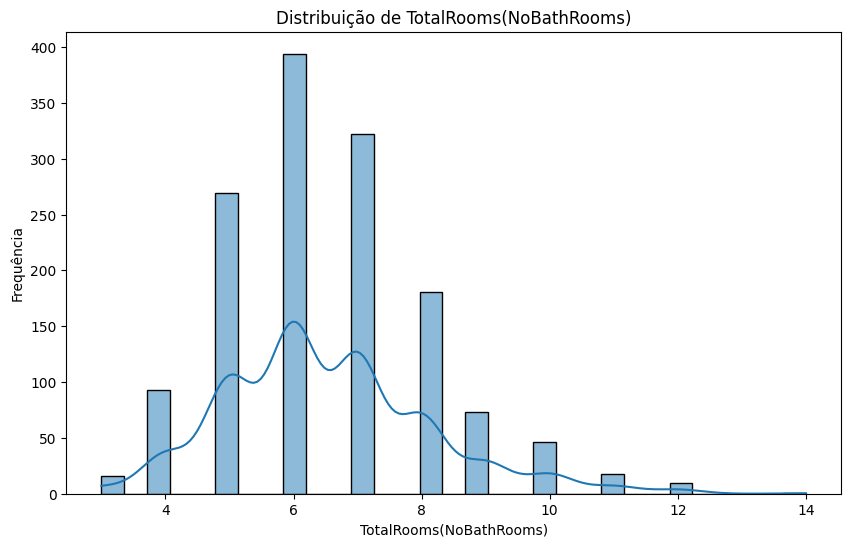

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(dfsubset['TotalRooms(NoBathRooms)'], kde=True)
plt.title('Distribuição de TotalRooms(NoBathRooms)')
plt.xlabel('TotalRooms(NoBathRooms)')
plt.ylabel('Frequência')
plt.show()


#### LotAreaSquareMeters

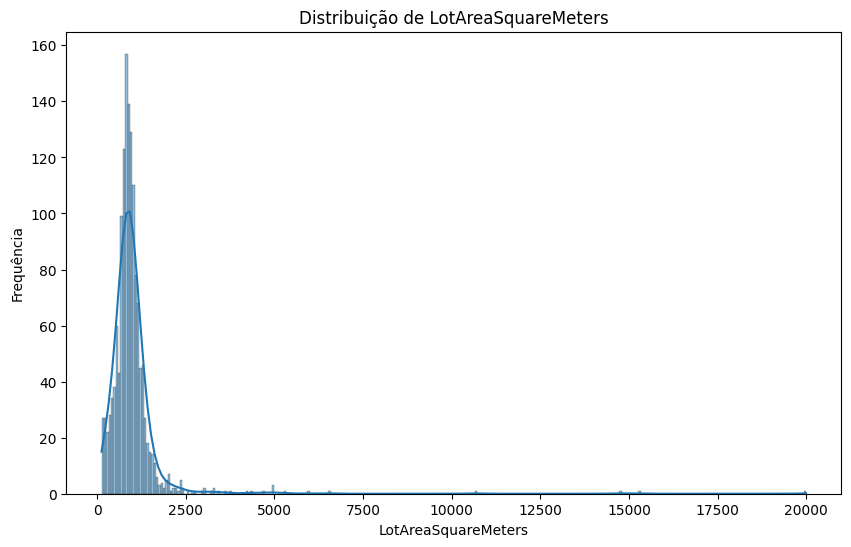

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(dfsubset['LotAreaSquareMeters'], kde=True)
plt.title('Distribuição de LotAreaSquareMeters')
plt.xlabel('LotAreaSquareMeters')
plt.ylabel('Frequência')
plt.show()



#### SquareMeters1stFloor

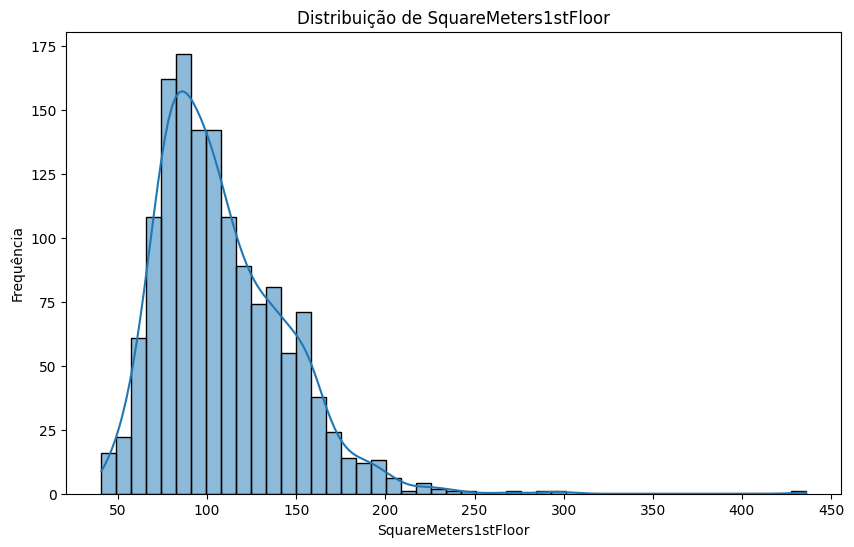

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(dfsubset['SquareMeters1stFloor'], kde=True)
plt.title('Distribuição de SquareMeters1stFloor')
plt.xlabel('SquareMeters1stFloor')
plt.ylabel('Frequência')
plt.show()


## Correlações

Text(0, 0.5, 'Number of Houses')

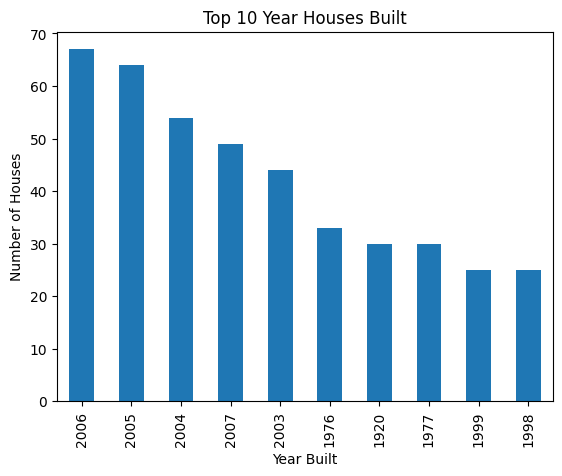

In [126]:
ax = dfsubset['YearBuilt'].value_counts()\
    .head(10)\
    .plot(kind='bar', title='Top 10 Year Houses Built')
        
ax.set_xlabel('Year Built')
ax.set_ylabel('Number of Houses')
    


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'QualidadeMateriais'}>,
        <Axes: title={'center': 'QualidadeEstadoHabitacao'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'AnoReforma'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotalRooms(NoBathRooms)'}>,
        <Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'MoSold'}>],
       [<Axes: title={'center': 'YrSold'}>,
        <Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'LotAreaSquareMeters'}>,
        <Axes: title={'center': 'SquareMeters1stFloor'}>]], dtype=object)

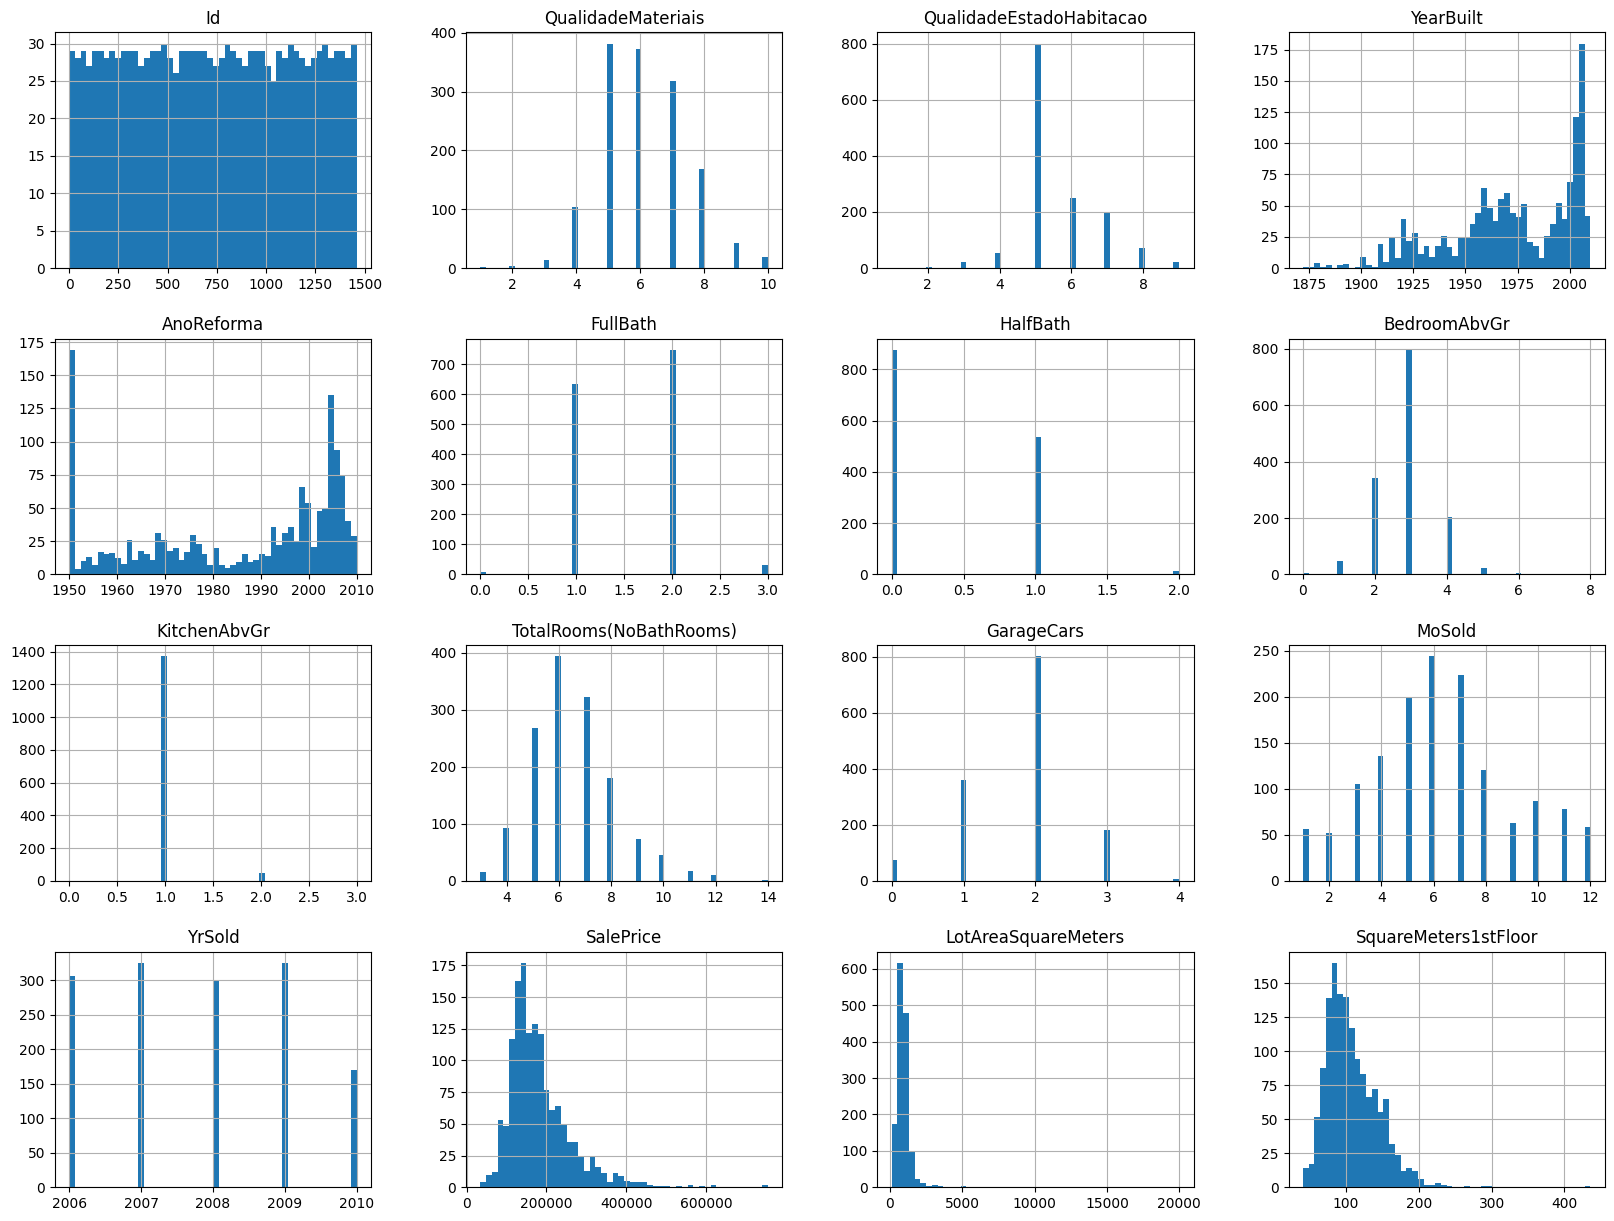

In [127]:
dfsubset.hist(bins=50, figsize=(20,15))

In [128]:
dfsubsetnum = dfsubset[['QualidadeMateriais', 'YearBuilt', 'AnoReforma', 
                    'TotalRooms(NoBathRooms)', 'SalePrice', 'LotAreaSquareMeters', 'SquareMeters1stFloor']]

In [129]:
dfsubsetcat = dfsubset[['DwellingZone', 'Neighborhood', 'HouseStyle',
       'BasementHeightRates', 'HeatingQC', 'KitchenQual', 'GarageType']]

In [130]:
corrMatrix = dfsubsetnum.corr()

In [131]:
corrMatrix

,QualidadeMateriais,YearBuilt,AnoReforma,TotalRooms(NoBathRooms),SalePrice,LotAreaSquareMeters,SquareMeters1stFloor
QualidadeMateriais,1.000000,0.570912,0.540792,0.434733,0.787893,0.104297,0.486051
YearBuilt,0.570912,1.000000,0.596172,0.090461,0.518620,0.012890,0.280280
AnoReforma,0.540792,0.596172,1.000000,0.187289,0.500163,0.009516,0.241368
TotalRooms(NoBathRooms),0.434733,0.090461,0.187289,1.000000,0.542720,0.191196,0.403726
SalePrice,0.787893,0.518620,0.500163,0.542720,1.000000,0.263822,0.613778
LotAreaSquareMeters,0.104297,0.012890,0.009516,0.191196,0.263822,1.000000,0.299527
SquareMeters1stFloor,0.486051,0.280280,0.241368,0.403726,0.613778,0.299527,1.000000


array([[<Axes: xlabel='QualidadeMateriais', ylabel='QualidadeMateriais'>,
        <Axes: xlabel='YearBuilt', ylabel='QualidadeMateriais'>,
        <Axes: xlabel='AnoReforma', ylabel='QualidadeMateriais'>,
        <Axes: xlabel='TotalRooms(NoBathRooms)', ylabel='QualidadeMateriais'>,
        <Axes: xlabel='SalePrice', ylabel='QualidadeMateriais'>,
        <Axes: xlabel='LotAreaSquareMeters', ylabel='QualidadeMateriais'>,
        <Axes: xlabel='SquareMeters1stFloor', ylabel='QualidadeMateriais'>],
       [<Axes: xlabel='QualidadeMateriais', ylabel='YearBuilt'>,
        <Axes: xlabel='YearBuilt', ylabel='YearBuilt'>,
        <Axes: xlabel='AnoReforma', ylabel='YearBuilt'>,
        <Axes: xlabel='TotalRooms(NoBathRooms)', ylabel='YearBuilt'>,
        <Axes: xlabel='SalePrice', ylabel='YearBuilt'>,
        <Axes: xlabel='LotAreaSquareMeters', ylabel='YearBuilt'>,
        <Axes: xlabel='SquareMeters1stFloor', ylabel='YearBuilt'>],
       [<Axes: xlabel='QualidadeMateriais', ylabel='AnoReform

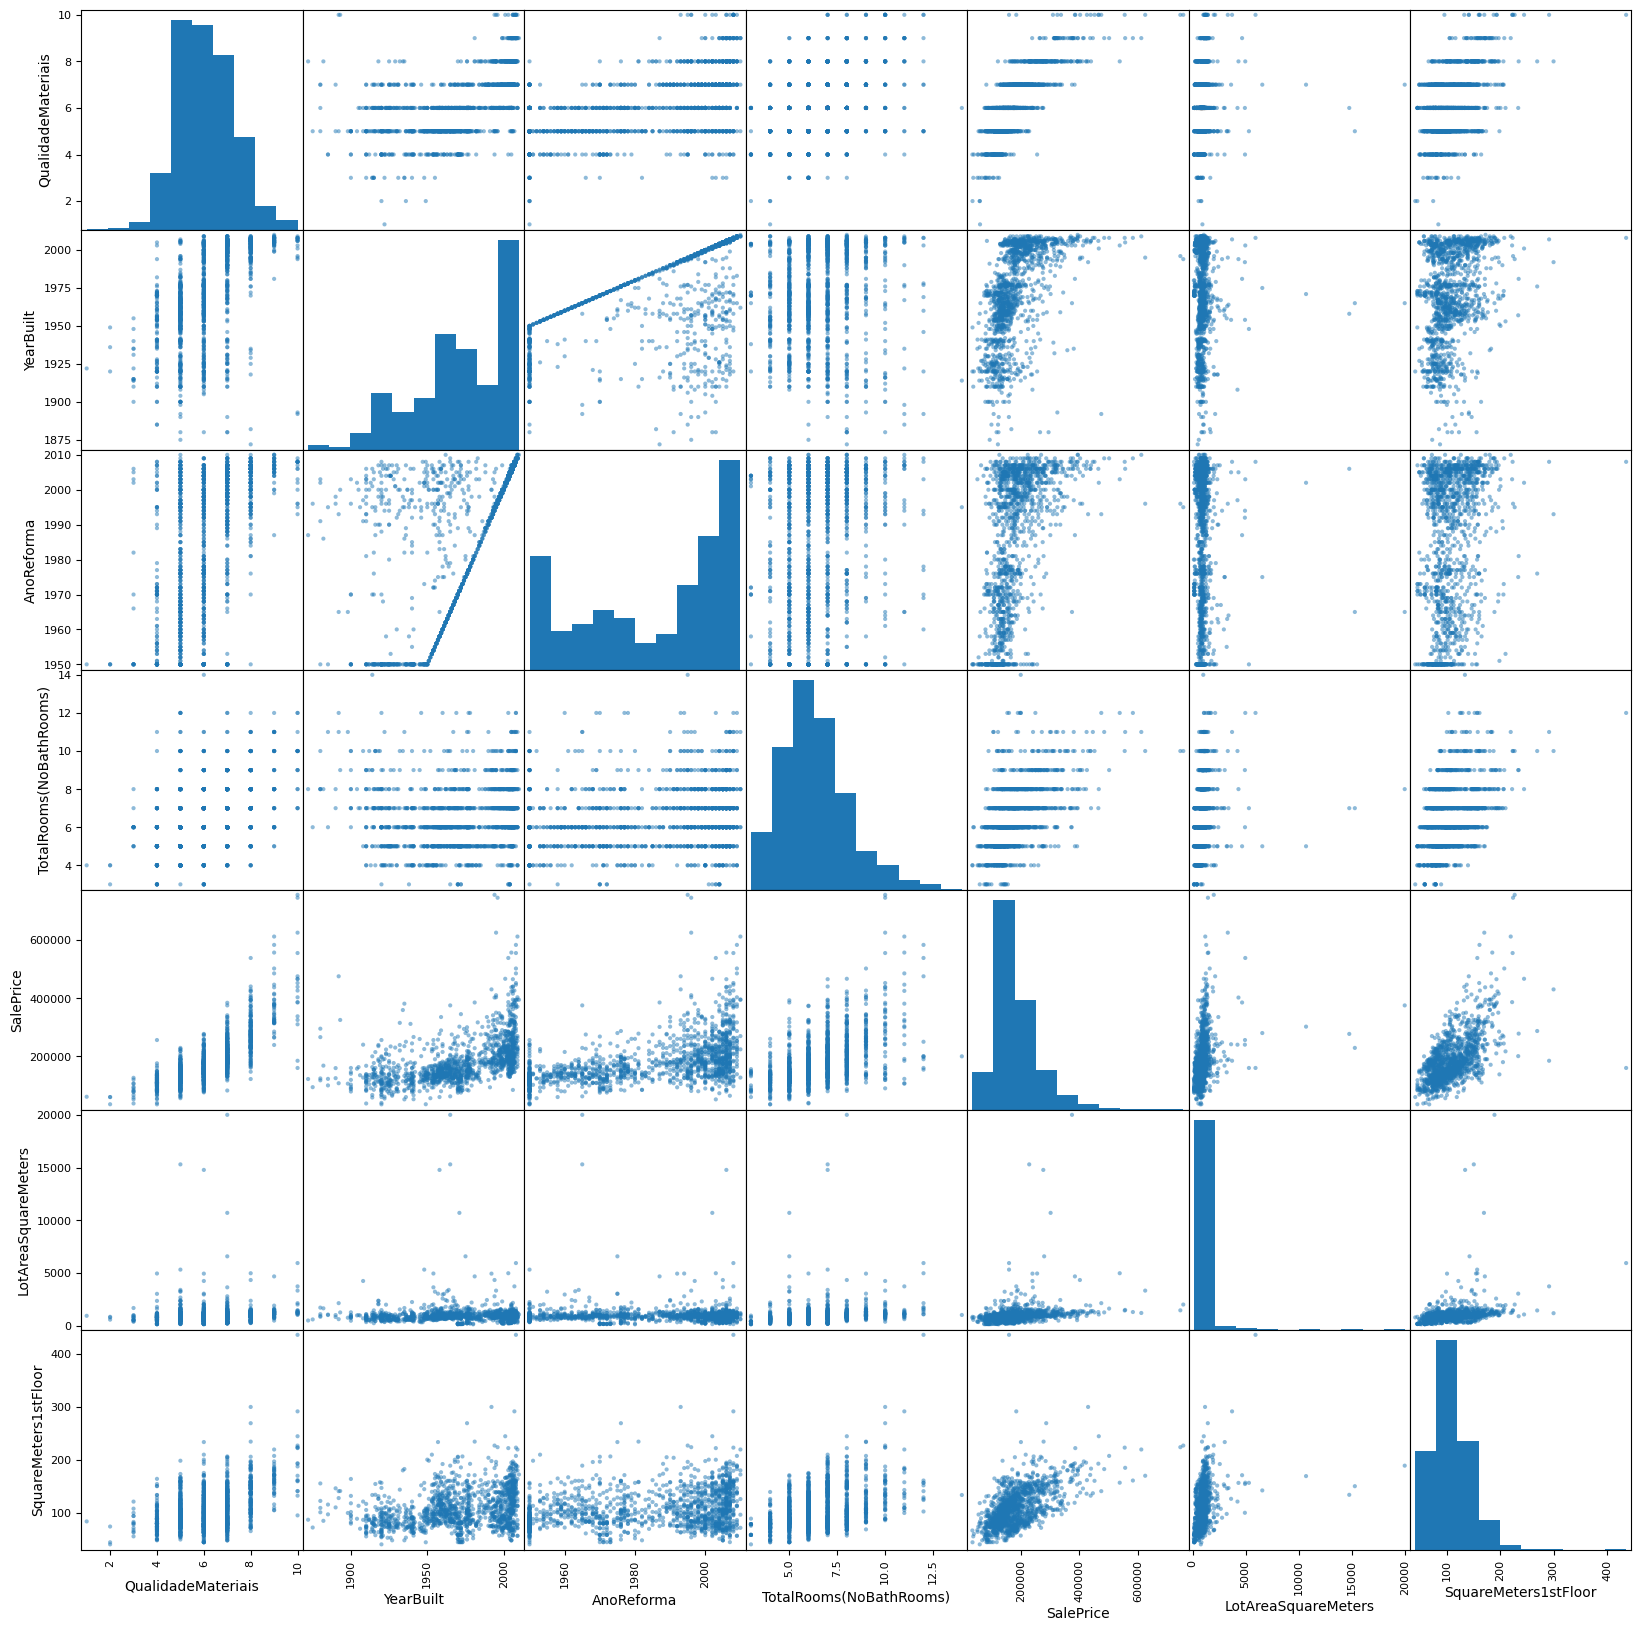

In [132]:
from pandas.plotting import scatter_matrix

scatter_matrix(dfsubsetnum, figsize=(20, 20))

<Axes: xlabel='QualidadeMateriais', ylabel='SalePrice'>

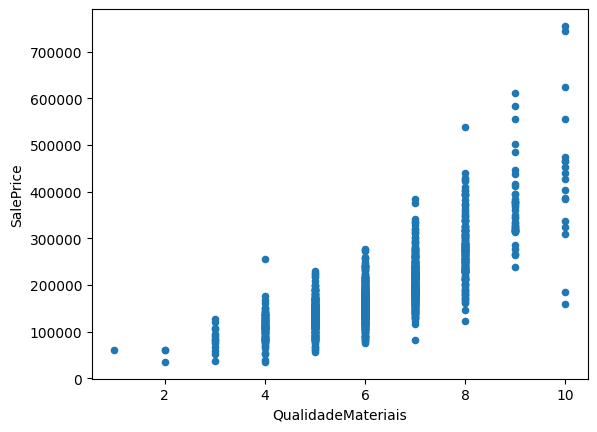

In [133]:
dfsubsetnum.plot(kind='scatter', x='QualidadeMateriais', y='SalePrice')